In [50]:
import pandas as pd
import numpy as np
PATH = 'H:\\CrashWeatherData\\DATA INFO\\'
PATH2 = 'H:\\CrashWeatherData\\SCRAPPER\\'

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [51]:
def NaNconverter(x):
    try:
        convert = {'None': 0, None: 0, ' ': 0, 'nan': 0, '00': 0}
        x = convert[str(x)]
    except KeyError:
        return x
    return x    

def lightconvert(x):
    convert = {'Daylight': 1, 'DarkLighted': 2, 'Dusk': 3, 'DarkNot Lighted': 4, ' ' : 0, 'Dawn': 5, '0': 0}
    x = convert[str(x)]
    return x

def surfaceconvert(x):
    convert = {'Dry': 'Dry', 'Wet': 'Wet', ' ': 0, 'Slush': 'Snow', 'Water (standing or moving)': 'Water (standing or moving)', 'Snow': 'Snow', 'Ice/Frost': 'Snow', '0': 0, 'Other': 0}
    x = convert[str(x)]
    return x

def speedconvert(x):
    x = str(x)
    x = x.replace('Â\xa0mph', '')
    try:
        x = x.replace('Ã\x82', '')
    except:
        return x
    return x

def dirconvert(x):
    convert = { None: 0, 'None': 0, ' ': 0, 'ENE': 16, 'South': 1, 'East': 2, 'SW': 3, 'Southwest': 3,
               'West': 4, 'North': 5, 'ESE': 6, 
               'NW': 7, 'Northwest': 7, 'NNW': 8, '0': 0,
               'NE': 9, 'Northeast': 9, 'WSW': 10, 'SSW': 11, 'NNE': 12, 'SE': 13, 'Southeast': 13, 'WNW': 14, 'SSE': 15
              }
    x = convert[str(x)]
    return x

def safe(x):
    try:
        convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Bicycle Helmet': 'Helmet', 'Motorcycle Helmet': 'Helmet', 'Non-Motorist Lighting': 0}
        x = convert[str(x)]
    except KeyError:
        return x
    return x

def Mnvr(x):
    try:
        convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Other': 0, 'PIT': 0 }
        x = convert[str(x)]
    except KeyError:
        return x
    return x

def CarSize(x):

    convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Other': 0, 'Pickup Truck': 'M', 'Passenger Car': 'M',
              'Sports Utility Vehicle (SUV)': 'M', 'Van': 'M', 'Single Unit Truck': 'L', 'Farm or Construction Equip.': 'XL',
              'Vehicle With Trailer': 'XL', 'Motorcycle': 'S', 'Truck Tractor (Bobtail)': 'XL', 'Tractor w/Twin Trailers': 'XL',
              'Panel Truck': 'L', 'Ambulance': 'L', 'Bus': 'L', 'Truck Towing House Trailer': 'XL', 'All Terrain Vehicle': 'S',
              'Motorized Recreational Vehicle': 'S', 'Tractor/Trailer': 'XL', 'Logging Tractor/Trailer': 'XL', 'Logging Truck': 'XL'}
    x = convert[str(x)]
    return x

def Construction(x):

    convert = { '0': 0, 0: 0, 'Construction': 'Construction', 'Maintenance': 'Construction', 'Unknown Type': 0}
    x = convert[str(x)]

    return x

def dirconvert(x):
    convert = { None: 0, 'None': 0, ' ': 0, 'ENE': 16, 'South': 1, 'East': 2, 'SW': 3, 'Southwest': 3,
               'West': 4, 'North': 5, 'ESE': 6, 
               'NW': 7, 'Northwest': 7, 'NNW': 8, '0': 0,
               'NE': 9, 'Northeast': 9, 'WSW': 10, 'SSW': 11, 'NNE': 12, 'SE': 13, 'Southeast': 13, 'WNW': 14, 'SSE': 15
              }
    x = convert[str(x)]
    return x

def rushHR(x):
    if (int(x) >= 700) and (int(x) <= 1000):
        x = 'Rush'
    elif (int(x) >= 1500) and (int(x) <= 2000):
        x = 'Rush'
    else:
        x = 'Not Rush'
    return x

def weekday(x):
    week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    week_end = ['Saturday','Sunday']
    if x in week_days:
        x = 1
    elif x in week_end:
        x = 0
    return x

################################################

def Zscore(colm_df):
    
    mean = colm_df.mean()
    std = colm_df.std()
    colm_List = colm_df.tolist()
    Z = list(map(lambda x: (x - mean)/std, colm_List))
    return Z

def intersection(x):
    if x == 0:
        pass
    elif x == -1:
        x = 'Type(-1)'
    elif x == 2:
        x = 'Type(2)'
    elif x == 1:
        x = 'Type(1)'
    
    return x

def OneHot(NewName, oldName, df, exceptions):
    uniqueL = df[str(oldName)].unique()
    for item in uniqueL:
        if (item in exceptions):
            df[str(NewName) + '_Other'] =  np.where(df[str(oldName)] == str(item), 1, 0)
        else:
            df[str(NewName) + '_' + str(item)] =  np.where(df[str(oldName)] == str(item), 1, 0)
    df = df.drop([str(oldName)], axis = 1)
    return df

###########################################################################


In [52]:
df = pd.read_csv(PATH + 'Stations with Cameras\\CrashWweather\\All_Crashes_with_weather.csv', encoding='latin1')

df['Gust'] = df['Gust'].map(speedconvert)
df['CURVA'] = Zscore(df['CURVA'])
df['intersection'] = df['intersection'].map(intersection)
df = OneHot('Interchange', 'intersection', df, ['0',0, 'Other', 'other'])

df = df.applymap(NaNconverter)
df['Speed'] = df['Speed'].map(speedconvert)
df = df.rename(columns = {"Speed":"Wind_Speed"}) 
df['Gust'] = df['Gust'].map(speedconvert)
df['Wind'] = df['Wind'].map(dirconvert)
df['DirectionF'] = df['DirectionF'].map(dirconvert)

df = df[df['RouteType'] != 'State Route']

# --- Always Dropped --- #
# --- Ignore these? --- #
df = df.drop(['RouteType', 'RouteTypeD', 'Route', 'IntersectR', 'Intersecti', 'PrivatePro'], axis = 1)
df = df.drop([ 'ObjectId','OBJECTID_1','OBJECTID_2','STATION_ID','TRAVEL_DIR','Join_Cou_1',
              'InterName','BUFF_DIST','Shape_Area','heightpixeltopdown','widthpixelleftright','Date2','Time2',
              'None','Time','ComboID', 'vehCount','SOURCE_ID','Shape__Len','timeid','camera','camerastatus',
              'FID','AgencyName', 'Date1', 'DateTime1','County', 'Milelog', 'LatDecimal', 'LongDecima','DirVeh1',
              'DirVeh2', 'FirstHarmf', 'DistanceFr', 'DirectionF', 'Wind_Speed', 'U2RoadCont','DriverAge2'], 1)

In [53]:
df.head()

,Temperature,Dew Point,Humidity,Wind,Gust,Pressure,Precip. Rate.,Precip. Accum.,index,speed,acc1,occupancy,AccidentNo,Time1,dayofweek,RampSectio,Injuries,Fatalities,MannerOfCo,LocationOf,Light,Surface,DriverAge1,DriverSafe,DriverSa_1,VehType1,VehType2,MnvrVeh1,MnvrVeh2,NumberOfVe,SeriousInj,VisibleInj,ComplaintI,U1Factors,U2Factors,U1TrafficC,U2TrafficC,U1RoadComp,U2RoadComp,U1RoadChar,U2RoadChar,U1RoadCont,U1WorkZone,U2WorkZone,CURVA,RAD_CURV,Anti1Clock0,Interchange_Type(-1),Interchange_Other,Interchange_Type(2),Interchange_Type(1)
0,79.6,60.0,51.0,11,0,30.36,0.0,0.00,1.221328e+10,93.0,-6.0,0.0,6429900.0,1426.0,Tuesday,0.0,0.0,0.0,Rear End,On Roadway - Non-Intersection,Daylight,Dry,0.0,0,Motorcycle Helmet,Pickup Truck,Motorcycle,Straight,Straight,3.0,0.0,0.0,0.0,Following too Close,Inattentive or Other Distracti,Lanes,Lanes,Black Top,Black Top,Straight and Level,Straight and Level,No Contributing Factors,0,0,1.849579,2.568567e+02,0.0,1,0,0,0
1,69.6,55.0,60.0,14,0,29.85,0.0,1.69,3.774375e+11,110.0,1.0,0.0,6439264.0,1550.0,Monday,0.0,0.0,0.0,Rear End,On Roadway - Roadway Intersection,Daylight,Dry,25.0,Lap and Shoulder Belt Used,Lap and Shoulder Belt Used,Passenger Car,Pickup Truck,Straight,Straight,2.0,0.0,0.0,0.0,Following too Close,No Contributing Factors,Lanes,Lanes,Black Top,Black Top,Straight and Level,Straight and Level,No Contributing Factors,0,0,0.396135,6.329002e+02,1.0,0,0,0,0
2,73.1,67.0,81.0,13,0,30.12,0.0,0.03,1.305196e+10,53.0,-6.0,0.0,6458268.0,1720.0,Friday,0.0,0.0,0.0,Rear End,On Roadway - Roadway Intersection,Daylight,Dry,22.0,Unknown,Unknown,Sports Utility Vehicle (SUV),Passenger Car,Straight,Straight,3.0,0.0,0.0,0.0,Following too Close,No Contributing Factors,Lanes,Lanes,Black Top,Black Top,Straight and Level,Straight and Level,No Contributing Factors,0,0,-0.597995,1.432643e+06,0.0,0,0,0,0
3,72.1,66.0,83.0,13,0,30.11,0.0,0.03,1.262914e+10,67.0,5.0,0.0,6458269.0,1800.0,Friday,0.0,0.0,0.0,Rear End,On Roadway - Roadway Intersection,Daylight,Dry,22.0,Unknown,Unknown,Van,Passenger Car,Straight,Straight,2.0,0.0,0.0,0.0,Following too Close,Following too Close,Lanes,Lanes,Black Top,Black Top,Straight and Level,Straight and Level,No Contributing Factors,0,0,-0.163850,1.430943e+03,0.0,0,0,0,0
4,75.1,67.0,75.0,11,0,29.94,0.0,0.00,1.305196e+10,90.0,2.0,0.0,6463369.0,1645.0,Tuesday,0.0,1.0,0.0,Rear End,On Roadway - Roadway Intersection,Daylight,Dry,0.0,0,Unknown,Passenger Car,Passenger Car,0,Stopped,2.0,0.0,0.0,1.0,Other,No Contributing Factors,Lanes,Lanes,Black Top,Black Top,Straight and Level,Straight and Level,No Contributing Factors,0,0,-0.597995,1.432643e+06,0.0,0,0,0,0


In [54]:
df['Light'].value_counts()

Daylight           2999
DarkNot Lighted     614
DarkLighted         358
Dusk                 56
Dawn                 48
0                    12
Name: Light, dtype: int64

## Human Vs. Non-Human Features

In [55]:
def DUICON(x):
    DUI = ['Under the Influence (U.I.),Driver Lost Control,Driver Condition,Too Fast For Conditions',
    'Under the Influence (U.I.),Driver Lost Control,Too Fast For Conditions',
    'Under the Influence (U.I.),Driver Lost Control,Too Fast For Conditions,Other',
    'Under the Influence (U.I.),Distracted,Other,Cell Phone',
    'Under the Influence (U.I.),Driver Lost Control,Changed Lanes Improperly,Driver Condition',
    'Under the Influence (U.I.),Changed Lanes Improperly,Driver Condition',
    'Under the Influence (U.I.)',
    'Under the Influence (U.I.),Mechanical Or Vehicle Failure',
    'Under the Influence (U.I.),Reaction to Object or Animal,Driver Condition',
    'Under the Influence (U.I.),Wrong Side of Road,Driver Condition,Disregard Other Traffic Contro',
    'Under the Influence (U.I.),Too Fast For Conditions',
    'Under the Influence (U.I.),Following too Close,Too Fast For Conditions,Distracted',
    'Under the Influence (U.I.),Driver Lost Control,Changed Lanes Improperly',
    'Under the Influence (U.I.),Driver Condition,Other',
    'Under the Influence (U.I.),Driver Lost Control',
    'Under the Influence (U.I.),Changed Lanes Improperly,Too Fast For Conditions',
    'Under the Influence (U.I.),Following too Close,Driver Lost Control',
    'Under the Influence (U.I.),Changed Lanes Improperly',
    'Under the Influence (U.I.),Other',
    'Under the Influence (U.I.),Following too Close',
    'Under the Influence (U.I.),Driver Condition']
    
    Distracted = ['Following too Close,Inattentive or Other Distracti','Following too Close,Distracted',
             'Inattentive or Other Distracti','Changed Lanes Improperly,Inattentive or Other Distracti',
             'Following too Close,Other Interior Distraction (Di',
             'Following too Close,Other Activity - Mobile Device',
             'Following too Close,Other Exterior Distraction (Di',
             'Following too Close,Texting (Distracted)',
             'Following too Close,Too Fast For Conditions,Inattentive or Other Distracti',
             'Following too Close,Other,Inattentive or Other Distracti',
             'Driver Lost Control,Other Interior Distraction (Di',
             'Following too Close,Other Activity - Mobile Device',
             'Following too Close,Other Interior Distraction (Di',
             'Following too Close,Distracted','Driver Lost Control,Distracted',
             'Other,Inattentive or Other Distracti,Other Activity - Mobile Device',
             'Driver Lost Control,Distracted,Cell Phone', 'Following too Close,Texting (Distracted)',
             'Following too Close,Other Activity - Mobile Device',
             'Changed Lanes Improperly,Inattentive or Other Distracti',
             'Inattentive or Other Distracti','Following too Close,Distracted',
             'Other Interior Distraction (Di','Other Interior Distraction (Di',
             'Improper Backing,Inattentive or Other Distracti',
             'Following too Close,Distracted,Inattentive or Other Distracti',
             'Distracted,Other','Occupant Distraction (Distract',
             'Misjudged Clearance,Inattentive or Other Distracti',
             'No Contributing Factors,Following too Close,Inattentive or Other Distracti','Cell Phone']
    
    FTC = ['Following too Close','Following too Close,Other','Following too Close,Driver Lost Control',
      'Driver Lost Control,Mechanical Or Vehicle Failure,Too Fast For Conditions',
      'No Contributing Factors,Following too Close','Following too Close,Too Fast For Conditions',
      'Weather Conditions,Too Fast For Conditions','Following too Close,Driver Condition',
      'Exceeding Speed Limit,Reckless Driving,Disregard Police - Evasion',
      'Following too Close,Driver Lost Control,Changed Lanes Improperly,Reckless Driving']
    
    FAST = ['Too Fast For Conditions','Driver Lost Control,Too Fast For Conditions',
        'Weather Conditions,Driver Lost Control,Too Fast For Conditions',
        'Driver Lost Control,Changed Lanes Improperly,Too Fast For Conditions',
        'Driver Lost Control,Driverless Vehicle,Too Fast For Conditions',
        'Following too Close,Too Fast For Conditions','No Contributing Factors,Following too Close,Too Fast For Conditions'
        'Weather Conditions,Driver Lost Control,Surface Defects,Too Fast For Conditions',
        'Too Fast For Conditions,Other','Too Fast For Conditions,Other',
        'Following too Close,Too Fast For Conditions,Distracted','No Contributing Factors,Too Fast For Conditions',
        'No Contributing Factors,Following too Close,Too Fast For Conditions',
        'Weather Conditions,Driver Lost Control,Surface Defects,Too Fast For Conditions',
        'Driver Lost Control,Too Fast For Conditions,Other',]
    
    Reckless = ['Reckless Driving','Exceeding Speed Limit,Reckless Driving,Racing','Reckless Driving,Racing',
        'Changed Lanes Improperly,Inattentive or Other Distracti,Reckless Driving',
        'Following too Close,Reckless Driving,Aggressive Driving',
        'Following too Close,Driver Lost Control,Changed Lanes Improperly,Reckless Driving',
        'Following too Close,Reckless Driving,Aggressive Driving',
        'Following too Close,Changed Lanes Improperly,Reckless Driving',
        'Following too Close,Exceeding Speed Limit,Driver Lost Control,Reckless Driving',
        'Following too Close,Exceeding Speed Limit']
    
    Animal = ['Reaction to Object or Animal','Driver Lost Control,Reaction to Object or Animal',
             'Reaction to Object or Animal,Other','Changed Lanes Improperly,Reaction to Object or Animal']
    
    CLI = ['Changed Lanes Improperly','Changed Lanes Improperly,Misjudged Clearance',
          'Changed Lanes Improperly,Other','Changed Lanes Improperly,Other',
          'Driver Lost Control,Changed Lanes Improperly','Failed to Yield,Changed Lanes Improperly'
          'Following too Close,Changed Lanes Improperly','No Contributing Factors,Changed Lanes Improperly',
          'Following too Close,Changed Lanes Improperly']

    TOP = ['Following too Close','Changed Lanes Improperly',
            0,'Other','Driver Lost Control',
            'Distracted','Too Fast For Conditions','DUI',
            'Misjudged Clearance','Failed to Yield',
            'Improper Backing','Improper Passing',
            'Driver Condition']
    
    if (x in DUI):
        x = 'DUI'
        
    elif (x in FTC):
        x = 'Following too Close'
        
    elif (x in FAST):
        x = 'Too Fast For Conditions'
        
    elif (x in Distracted):
        x = 'Distracted'
        
    elif (x in Animal):
        x = 'Other'
        
    elif (x in CLI):
        x = 'Changed Lanes Improperly'
        
    elif (x in Reckless):
        x = 'Reckless'
        
    elif (x in TOP):
        pass
    
    elif x == 'Driver Condition':
        x = 'Other'
        
    elif x == 'Mechanical Or Vehicle Failure':
        x = 'Other'
        
    else:
        x = 'Other'
    return x

# Factors
df['U1Factors'] = df['U1Factors'].map(DUICON)
df = OneHot('Factors', 'U1Factors', df, ['0'])
df['U2Factors'] = df['U2Factors'].map(DUICON)
df = df.drop(['U2Factors'], 1)

df = df[df['MnvrVeh1'] != 'Entering/Leaving Driveway']
df = df[df['MnvrVeh1'] != 'Entering/Leaving Parking']
df = df[df['MnvrVeh2'] != 'Entering/Leaving Parking']
df['MnvrVeh1'] = df['MnvrVeh1'].map(Mnvr)
df['MnvrVeh2'] = df['MnvrVeh2'].map(Mnvr)

df = df.drop(['LocationOf','MnvrVeh2','MnvrVeh1'], 1)

In [56]:
# --- ADDING COLUMNS --- #
dfgen = pd.read_csv('H:\\CrashWeatherData\\8month_crashes_with_acceleration.csv', encoding='latin1')

def add_cols(df, dfgen, indexer):
    selected = df['AccidentNo'].tolist()
    keys = dfgen['AccidentNo'].tolist()
    vals = dfgen[indexer].tolist()
    converter = dict(zip(keys, vals))
    recall = list(map(lambda x: converter.get(x), selected))
    df[indexer] = recall
    return df

df = add_cols(df, dfgen, 'count_')
df = add_cols(df, dfgen, 'NumberOfVe')
df = add_cols(df, dfgen, 'occupancy')
# df = OneHot('day', 'dayofweek', df, ['0',0, 'Other', 'other'])


In [57]:
df = df.drop(['index', 'Time1', 'U1RoadComp', 'U2RoadComp', 'U1TrafficC', 'U2TrafficC','AccidentNo'], 1)
#RoadCont
exceptions = ['Loose Material On Surface','Ruts, Holes, Bumps','Incident Response Scene',
              'Shoulder (none, low, soft, high)','Running Water','0',0, 'Other', 'other']

In [58]:
non_Human = ['RampSectio', 'Surface', 'U1RoadChar', 'U2RoadChar', 'U1RoadCont', 'U1WorkZone', 'U2WorkZone',
 'Anti1Clock0', 'Interchange_Type(-1)', 'Interchange_Other','Interchange_Type(2)', 'Interchange_Type(1)',
 'CURVA', 'RAD_CURV','VehType1', 'VehType2','SeriousInj','VisibleInj','ComplaintI','NumberOfVe','Surface',
 'occupancy','Injuries','Fatalities']
df = df.drop(non_Human, 1)

dd = ['Precip. Rate.', 'Precip. Accum.','dayofweek','DriverSafe', 'DriverSa_1','Light','count_','Temperature','Dew Point','Humidity','Wind','Gust','Pressure','speed','acc1']
df = df.drop(dd, 1)

In [59]:
df.head()

,MannerOfCo,DriverAge1,Factors_Following too Close,Factors_Other,Factors_Misjudged Clearance,Factors_Changed Lanes Improperly,Factors_Driver Lost Control,Factors_Reckless,Factors_Too Fast For Conditions,Factors_Distracted,Factors_Driver Condition,Factors_Improper Passing,Factors_Improper Backing,Factors_Failed to Yield,Factors_0,Factors_DUI
0,Rear End,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rear End,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rear End,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Rear End,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Rear End,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
def mkLabel(x):
    convert = {'Rear End': 1, 'Sideswipe-Same Direction': 2, 'Angle': 3,
               'Not A Collision with Motor Vehicle': 4, 'Head On': 5, 0:0, 'Sideswipe-Opposite Direction': 6, '0': 0}
    x = convert[str(x)]
    return x

df['MannerOfCo'] = df['MannerOfCo'].map(mkLabel)
# --- Drop other MOC --- #
df = df[df['MannerOfCo'] != 5]
df = df[df['MannerOfCo'] != 6]
df = df[df['MannerOfCo'] != 0]

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
labels = df['MannerOfCo'].value_counts().index.tolist()
orderCr = [1,2,3,4]

fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.barplot(data=df, x='MannerOfCo', y='MannerOfCo', saturation=1, order=orderCr, estimator=lambda x: len(x)/len(df)*100, ax=ax,)
ax.tick_params(labelsize=20)
ax.axes.set_title('Distribution of Manner of Collision of Large Vehicles',fontsize=27)
ax.set_xlabel("",fontsize=25)
ax.set_ylabel('Percent %',fontsize=25)
ax.set_xticklabels(['Rear End','Sideswipe-Same Direction','Angle','Not A Collision with Motor Vehicle'], rotation = 20)
# ax.set_xticklabels([convert[labels[0]],convert[labels[1]],convert[labels[2]],convert[labels[3]]], rotation = 20)
ax.axes.set_ylim(0,100)

(0, 100)

In [62]:
df = df[df['MannerOfCo'] != 4]

## Clustering to remove outliers

In [63]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
rcParams['axes.labelsize'] = "large"
rcParams['font.size']= 20

from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import scipy.cluster.hierarchy as sch

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
    
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes


def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    
    
    CC = get_cluster_classes(B)
    return CC
def give_cluster_assigns(df, numclust, transpose = True):
#     if transpose==True:
#         data_dist = pdist(df.transpose())
#         data_link = linkage(data_dist,  metric='correlation', method='complete')
#         cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
#     else:
    data_dist = pdist(df)
    data_link = linkage(data_dist,  metric='correlation', method='complete')
    cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    cluster_diction = {}
    for i in np.arange(1,numclust+1):
        cluster_diction[str(i)] = cluster_assigns[cluster_assigns==i].index.tolist()
        
        
    return cluster_assigns, cluster_diction        
#         print("Cluster ",str(i),": ( N =",len(cluster_assigns[cluster_assigns==i].index),")", ", ".join(list(cluster_assigns[cluster_assigns==i].index)))

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

b,"['(247)', '(3473)']"


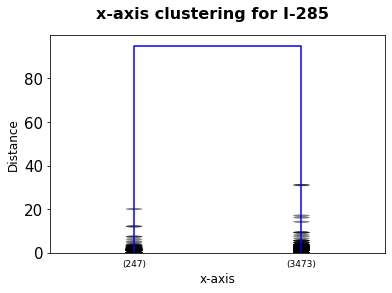

In [66]:
%matplotlib inline
n_clusters = 2
get_clust_graph(df, n_clusters, transpose=True,dataname="I-285", save="ww2", xticksize=9)

In [67]:
# Get a dictionary of index's in each cluster
cluster_assigns, cluster_diction = give_cluster_assigns(df, n_clusters, transpose = True)

## For removing outliers 

In [68]:
for Cluster in [*cluster_diction]:
    print(len(cluster_diction[str(Cluster)]))
    
for Cluster in [*cluster_diction]:
    print(len(cluster_diction[str(Cluster)]))
# --- Fixed Pool Update --- #
selected = cluster_diction['2']
poolFixed = df[df.index.isin(selected)]
poolFixed.shape

247
3473
247
3473


(3473, 16)

In [69]:
def unique_cols2(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    lister = (a[0] == a[1:]).all(0)
    d = {'Column':df.columns.tolist(), 'Sing':lister.tolist()}
    ddf = pd.DataFrame.from_dict(d)
    ddf = ddf[ddf['Sing'] == True]
    remover = ddf['Column'].tolist()
    df = df.drop(remover, 1)
    return df
df = unique_cols2(df)
# poolFixed = unique_cols2(poolFixed)

In [70]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a[1:]).all(0)


In [71]:
totalpooled = []
for Cluster in [*cluster_diction]:
    selected = cluster_diction[Cluster]
    totalpooled = totalpooled + selected
len(totalpooled)
poolFixed = df[df.index.isin(totalpooled)]

In [72]:
# for Cluster in [*cluster_diction]:
#     selected = cluster_diction[Cluster]
#     pool = df[df.index.isin(selected)]
#     f, ax = plt.subplots(figsize=(15, 15))
#     corr = pool.corr()
#     hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                      linewidths=.05)
#     f.subplots_adjust(top=0.93)
#     t= f.suptitle('Cluster ' + str(Cluster), fontsize=8)

In [74]:
df.columns = ['MannerOfCo', 'DriverAge', 'Following too Close',
       'Other', 'Misjudged Clearance',
       'Changed Lanes Improperly', 'Driver Lost Control',
       'Reckless', 'Too Fast For Conditions',
       'Distracted', 'Driver Condition',
       'Improper Passing', 'Improper Backing',
       'Failed to Yield', 'DUI']

In [75]:
df = df.drop(['Other'], 1)

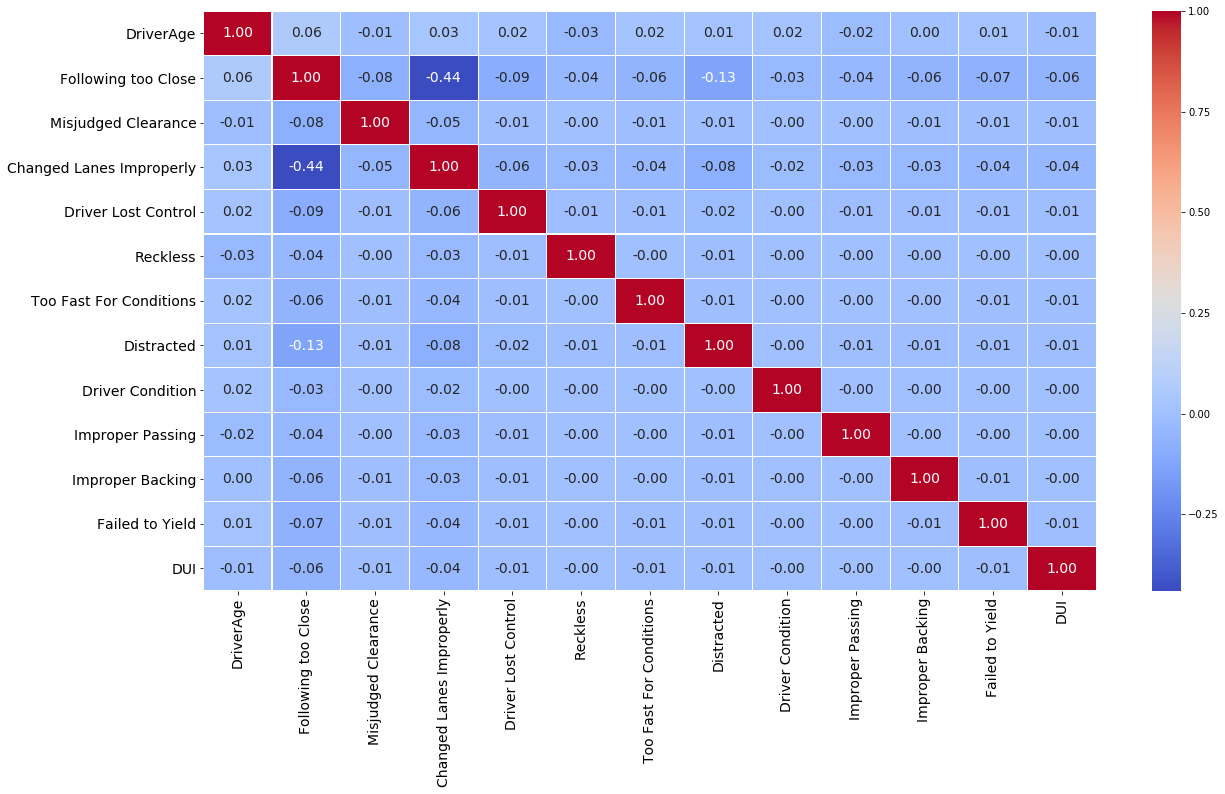

In [76]:
# --- Correlation Matrix Heatmap --- #
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(figsize=(20, 10))
corr = df.drop(['MannerOfCo'], 1).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05, annot_kws={"size": 14})
f.subplots_adjust(top=0.93)
hm.tick_params(labelsize=14)

# Remove outliers by z score then LDA

In [77]:
df.columns

Index(['MannerOfCo', 'DriverAge', 'Following too Close', 'Misjudged Clearance',
       'Changed Lanes Improperly', 'Driver Lost Control', 'Reckless',
       'Too Fast For Conditions', 'Distracted', 'Driver Condition',
       'Improper Passing', 'Improper Backing', 'Failed to Yield', 'DUI'],
      dtype='object')

In [78]:
# --- Fixed Pool Loop --- #
new_df = df[df.index.isin(totalpooled)]
new_df = new_df[new_df['MannerOfCo'] != 0 ]


In [79]:
labels = df.columns.tolist()
labels.remove('MannerOfCo')
X = new_df.drop(['MannerOfCo'], 1).to_numpy()
y = new_df['MannerOfCo'].to_numpy()
ydf = new_df['MannerOfCo']
#scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
x_new = lda.transform(X)   

################################# MAX For LD1 #################################
                      Labels        dx        dy
1        Following too Close  1.025819  0.286156
3   Changed Lanes Improperly  0.641746  0.206502
7                 Distracted  0.193359  0.297493
4        Driver Lost Control  0.171112  0.476307
2        Misjudged Clearance  0.156658  0.377331
10          Improper Backing  0.130743  0.101335
11           Failed to Yield  0.115644  0.038288
9           Improper Passing  0.098707  0.158249
0                  DriverAge  0.074323  0.133493
5                   Reckless  0.073482  0.212116
12                       DUI  0.040780  0.546446
8           Driver Condition  0.031272  0.133193
6    Too Fast For Conditions  0.011246  0.509454


################################# MAX For LD2 #################################
                      Labels        dx        dy
12                       DUI  0.040780  0.546446
6    Too Fast For Conditions  0.011246  0.509454
4    

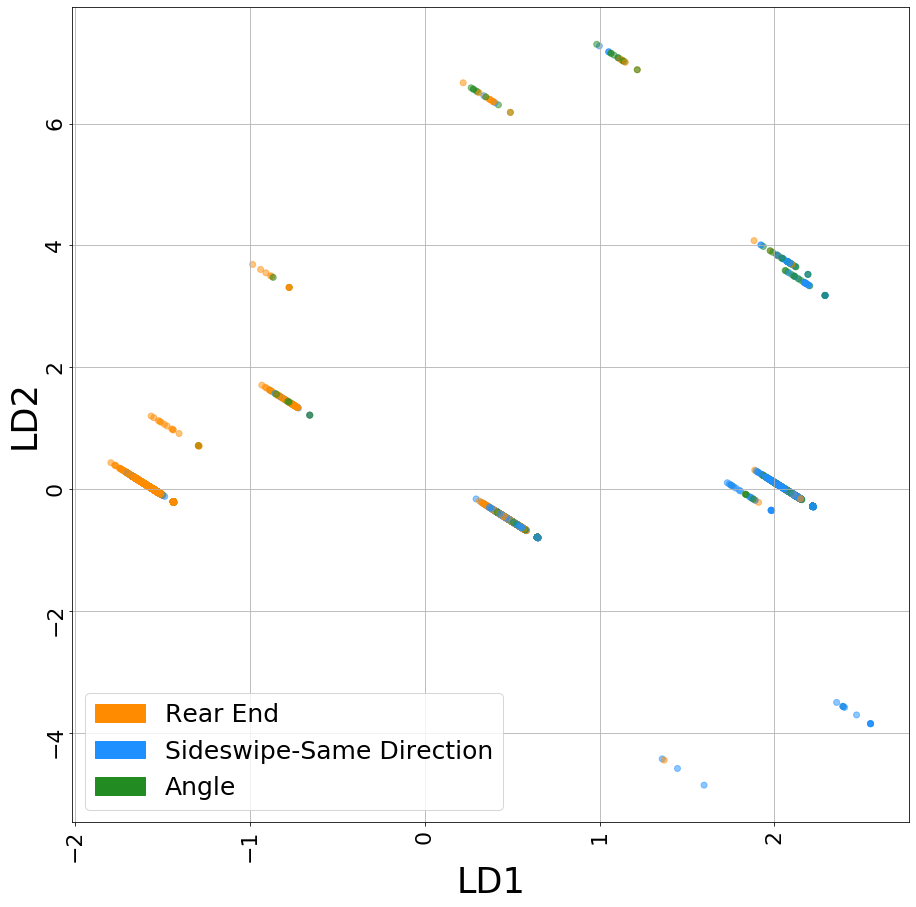

In [80]:
import matplotlib.patches as mpatches
colors = ['darkorange' ,'dodgerblue','forestgreen']

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

def myplot(score,coeff,labels, y):
    %matplotlib inline 
    plt.rcParams['figure.figsize'] = [15, 15]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y = y.replace({0: 'black', 1:'darkorange' , 2:'dodgerblue' , 3:'forestgreen', 4: 'purple', 5: 'magenta', 6: 'blue'})
 

    plt.scatter(xs ,ys, c = y, alpha = 0.5) #without scaling
    
    dy = []
    dx = []
    l = []
    for i in range(n):
        pass
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        dx.append(coeff[i,0])
        dy.append(coeff[i,1])
        l.append(labels[i])

        if labels is None:
            pass
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=7)
        else:
            pass
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=7)
    
    d = {'Labels': l, 'dx': dx,'dy': dy}
    arrow = pd.DataFrame(data=d)
    arrow.dx = arrow.dx.abs()
    arrow.dy = arrow.dy.abs()
    LD1 = arrow.sort_values(by='dx', ascending=False)
    LD2 = arrow.sort_values(by='dy', ascending=False)
    print('################################# MAX For LD1 #################################')
    print(LD1.head(15))
    print('\n\n################################# MAX For LD2 #################################')
    print(LD2.head(15))
    
    return arrow, LD1, LD2


 

#Call the function. 

arrow, LD1, LD2 = myplot(x_new[:,0:6], lda.scalings_, labels, ydf)
plt.xlabel("LD{}".format(1), fontsize=35)
plt.ylabel("LD{}".format(2), fontsize=35)
plt.grid()
red_patch = mpatches.Patch(color=colors[0], label='Rear End')
cyan_patch = mpatches.Patch(color=colors[1], label='Sideswipe-Same Direction')
lime_patch = mpatches.Patch(color=colors[2], label='Angle')
plt.legend(handles=[red_patch, cyan_patch, lime_patch], fontsize=25)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22, rotation=90)
plt.show()


# {'Rear End': 1, 'Sideswipe-Same Direction': 2, 'Angle': 3,'Not A Collision with Motor Vehicle': 4,
# 'Head On': 5, 0:0, 'Sideswipe-Opposite Direction': 6, '0': 0}

-0.3
0.15
0.15
0.15
0.79
0.15
0.15
0.25
################################# MAX For LD1 #################################
                      Labels        dx        dy
1        Following too Close  1.025819  0.286156
3   Changed Lanes Improperly  0.641746  0.206502
7                 Distracted  0.193359  0.297493
4        Driver Lost Control  0.171112  0.476307
2        Misjudged Clearance  0.156658  0.377331
10          Improper Backing  0.130743  0.101335
11           Failed to Yield  0.115644  0.038288
9           Improper Passing  0.098707  0.158249
0                  DriverAge  0.074323  0.133493
5                   Reckless  0.073482  0.212116
12                       DUI  0.040780  0.546446
8           Driver Condition  0.031272  0.133193
6    Too Fast For Conditions  0.011246  0.509454


################################# MAX For LD2 #################################
                      Labels        dx        dy
12                       DUI  0.040780  0.546446
6    Too Fast 

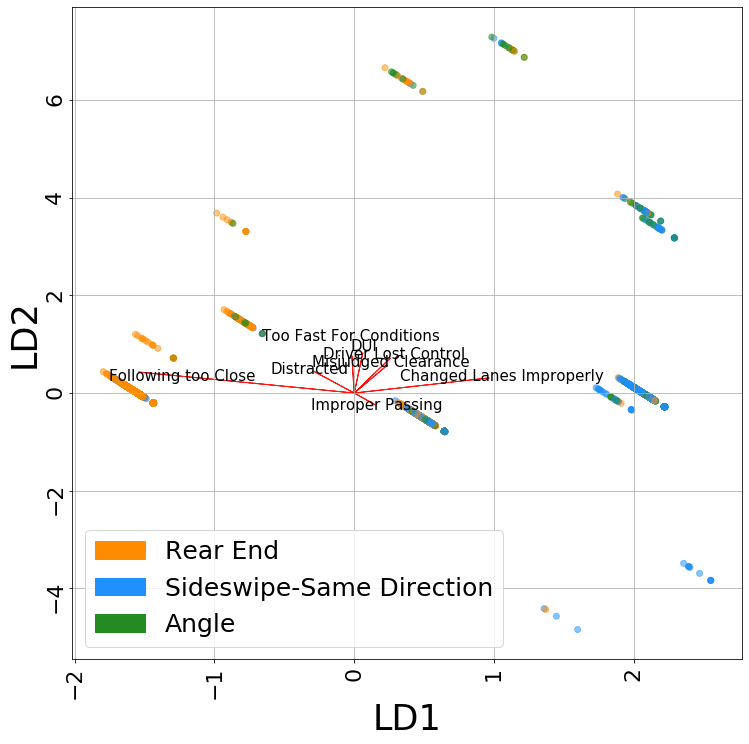

In [81]:
import matplotlib.patches as mpatches
colors = ['darkorange' ,'dodgerblue','forestgreen']

import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
plt.rcParams['figure.figsize'] = [12, 12]

def myplot(score,coeff,labels, y):
    %matplotlib inline 
    plt.rcParams['figure.figsize'] = [12, 12]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y = y.replace({0: 'black', 1:'darkorange' , 2:'dodgerblue' , 3:'forestgreen', 4: 'purple', 5: 'magenta', 6: 'blue'})
 

    plt.scatter(xs ,ys, c = y, alpha = 0.5) #without scaling
    
    dy = []
    dx = []
    l = []
    for i in range(n):
        pass
        dx.append(coeff[i,0])
        dy.append(coeff[i,1])
        l.append(labels[i])

        m=1.5
        if labels[i] in ['Driver Condition','Failed to Yield','DriverAge','Improper Backing','Reckless']:
            pass
        
        else:
            plt.arrow(0, 0, coeff[i,0]*m, coeff[i,1]*m,color = 'r',alpha = 0.9)
            if labels[i] in ['Too Fast For Conditions']:
                p = 0.79
            elif labels[i] in ['DUI']:
                p = 0.25
            elif labels[i] in ['Following too Close']:
                p = -0.3
            
            else:
                p=0.15
            print(p)
            if labels is None:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), "Var"+str(i+1), color = 'black',
                         ha = 'center', va = 'center', fontsize=15)
            else:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), labels[i], color = 'black',
                         ha = 'center', va = 'center', fontsize=15)

    
    d = {'Labels': l, 'dx': dx,'dy': dy}
    arrow = pd.DataFrame(data=d)
    arrow.dx = arrow.dx.abs()
    arrow.dy = arrow.dy.abs()
    LD1 = arrow.sort_values(by='dx', ascending=False)
    LD2 = arrow.sort_values(by='dy', ascending=False)
    print('################################# MAX For LD1 #################################')
    print(LD1.head(15))
    print('\n\n################################# MAX For LD2 #################################')
    print(LD2.head(15))
    
    return arrow, LD1, LD2


 

#Call the function. 

#Call the function. 
arrow, LD1, LD2 = myplot(x_new[:,0:6], lda.scalings_, labels, ydf)
plt.xlabel("LD{}".format(1), fontsize=35)
plt.ylabel("LD{}".format(2), fontsize=35)
plt.grid()
red_patch = mpatches.Patch(color=colors[0], label='Rear End')
cyan_patch = mpatches.Patch(color=colors[1], label='Sideswipe-Same Direction')
lime_patch = mpatches.Patch(color=colors[2], label='Angle')
plt.legend(handles=[red_patch, cyan_patch, lime_patch], fontsize=25)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22, rotation=90)
plt.show()


# {'Rear End': 1, 'Sideswipe-Same Direction': 2, 'Angle': 3,'Not A Collision with Motor Vehicle': 4,
# 'Head On': 5, 0:0, 'Sideswipe-Opposite Direction': 6, '0': 0}

In [88]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import precision_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

labels = df.columns.tolist()
labels.remove('MannerOfCo')
new_df = df[df.index.isin(totalpooled)]
new_df = new_df[new_df['MannerOfCo'] != 0 ]
X = new_df.drop(['MannerOfCo'], 1)

########## Select Standard Scaler ###########
scaled_features = X.copy()

col_names = ['DriverAge']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features

##############################################
Xdf = X
X = X
y = new_df['MannerOfCo']

# Must start at 0
y = y - 1

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=labels)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=labels)
dtrain, dtest

## XGBoost

In [144]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

def fast_boost(X_train, y_train, X_test, y_test):
    
    from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
    
    space = {
        'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
        'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
        'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
        'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
        'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

    from sklearn.model_selection import train_test_split

    def objective(space):
        
        classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                                max_depth = int(space['max_depth']),
                                learning_rate = space['learning_rate'],
                                gamma = space['gamma'],
                                min_child_weight = space['min_child_weight'],
                                subsample = space['subsample'],
                                colsample_bytree = space['colsample_bytree']
                                )

        classifier.fit(X_train, y_train)

        # Applying k-Fold Cross Validation
        from sklearn.model_selection import cross_val_score
        accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 4)
        CrossValMean = accuracies.mean()
        CrossValVar = accuracies.var()
        
        print("CrossValMean:", CrossValMean)
        print("CrossValVar:", CrossValVar)

        return{'loss':1-CrossValMean, 'status': STATUS_OK }


    ###################################################
    trials = Trials()
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials)

    print("Best: ", best)
    ###################################################

    from xgboost import XGBClassifier
    XGBmodel = XGBClassifier(n_estimators = best['n_estimators'],
                                max_depth = best['max_depth'],
                                learning_rate = best['learning_rate'],
                                gamma = best['gamma'],
                                min_child_weight = best['min_child_weight'],
                                subsample = best['subsample'],
                                colsample_bytree = best['colsample_bytree']
                                )

    XGBmodel.fit(X_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = XGBmodel, X = X_train, y = y_train, cv = 4)
    CrossValMean = accuracies.mean()
    print("Final CrossValMean: ", CrossValMean)

    CrossValSTD = accuracies.std()
    y_pred = XGBmodel.predict(X_test)
    
    draw_cm(y_test, y_pred)
    acc_nb = round(metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    print('Total Accuracy: ', acc_nb )
    

    
    return XGBmodel

In [138]:
XGBmodel = fast_boost(X_train, y_train, X_test, y_test)

## SHAP plots

In [ ]:
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800

import shap
import matplotlib.pyplot as pl
names = {1:'Rear End', 2:'Sideswipe-Same Direction', 3:'Angle',4:'Not A Collision with Motor Vehicle'}

y = new_df['MannerOfCo']
labelx = ['Rear End','Sideswipe-Same Direction','Angle']
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size=0.3, random_state=0)
plt.rcParams['figure.figsize'] = [15, 5]


from matplotlib import colors as plt_colors
classes = ['r', 'g', 'b']
# set RGB tuple per class
colors = [(255/255,140/255,0), (30/255,144/255,255/255), (34/255,139/255,34/255)]
# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])


explainer = shap.TreeExplainer(XGBmodel)
shap_values = explainer.shap_values(X_test,approximate=True)
ss = shap.summary_plot(shap_values, X_test, plot_type="bar", color=cmap, class_names=labelx)

for class_num in range(len(shap_values)):
    print('############################################ Class ' + str(names[class_num + 1]) + ' ############################################')
    shap.summary_plot(shap_values[class_num], X_test)